# Question 4

In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import random
# from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

## part a

In [3]:
# Do not change this cell
image = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)

In [4]:
def Add_Noise(img):
    """
    Add salt and pepper noise to the input image.
        Parameters:
          image: Input image (numpy array).
        Returns:
          Image with salt and pepper noise added.
    """
    amount = 0.05
    salt_vs_pepper = 0.5
    output_image = img
    num_salt = random.randint(0, 50)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in output_image.shape]
    output_image[coords] = 255

    # Pepper mode
    num_pepper = random.randint(0, 50)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in output_image.shape]
    output_image[coords] = 0

    return output_image

(-0.5, 374.5, 499.5, -0.5)

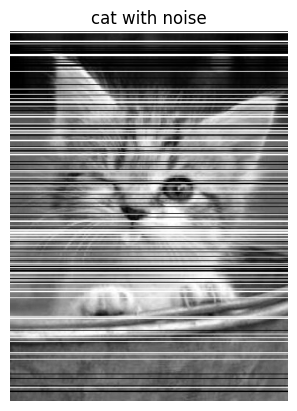

In [5]:
image = Add_Noise(image)
plt.imshow(image,cmap='gray')
plt.title("cat with noise")
plt.axis("off")

# part b

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [60]:
# padding test


# filter_size = 7
# padded_img = np.pad(img, ((filter_size // 2, filter_size // 2), (filter_size // 2, filter_size // 2)), mode='reflect')
# # padded_img[len(padded_img) - 1]
# # len(padded_img)
# padded_img[502][380]

119

In [8]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''

  #######################
  height, width = img.shape
  padded_img = np.pad(img, ((filter_size // 2, filter_size // 2), (filter_size // 2, filter_size // 2)), mode='reflect')
  
 

  # padded_img = [[0] * (width + filter_size - 1) for _ in range(height + filter_size - 1)]

  # # Fill the central part of the padded_img with the original image
  # for i in range(height):
  #     for j in range(width):
  #         padded_img[i + filter_size // 2][j + filter_size // 2] = img[i][j]

  # # Reflect padding for top and bottom rows
  # for i in range(filter_size // 2):
  #     padded_img[i] = padded_img[filter_size // 2 - i][:]
  #     padded_img[-i-1] = padded_img[-(filter_size // 2) + i - 1][:]
      
  # # Reflect padding for left and right columns
  # for i in range(len(padded_img)):
  #     for j in range(filter_size // 2):
  #         padded_img[i][j] = padded_img[i][filter_size // 2 - j]
  #         padded_img[i][-j-1] = padded_img[i][- (filter_size // 2) + j - 1]

  return padded_img

In [9]:
def Averaging_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed averaging blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))
  height, width = img.shape
  for i in range(height):
      for j in range(width):
          # Calculate the average of the filter_size x filter_size neighborhood
          total = 0
          for k in range(-filter_size // 2, filter_size // 2 + 1):
              for l in range(-filter_size // 2, filter_size // 2 + 1):
                  total += image[i + filter_size // 2 + k][j + filter_size // 2 + l]
          result[i][j] = total / (filter_size * filter_size)

  return result

In [10]:
def Median_Blurring(img, filter_size):
  '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      result (ndarray): computed median blurring
  '''
  image = Reflect101(img, filter_size)
  result = np.zeros((img.shape))

  height, width = img.shape
    # Compute Median Blurring
  for i in range(height):
      for j in range(width):
          # Extract the filter_size x filter_size neighborhood
          neighborhood = []
          for k in range(-filter_size // 2, filter_size // 2 + 1):
              for l in range(-filter_size // 2, filter_size // 2 + 1):
                  neighborhood.append(image[i + filter_size // 2 + k][j + filter_size // 2 + l])
          # Calculate the median value of the neighborhood
          neighborhood.sort()
          median_index = len(neighborhood) // 2
          result[i][j] = neighborhood[median_index]


  return result

In [11]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    #######################
    center = filter_size // 2
    total = 0
    for i in range(filter_size):
      for j in range(filter_size):
        kernel[i][j] = np.exp(-((i - center) ** 2 + (j - center) ** 2) / (2 * std ** 2))
        total += kernel[i][j]
    # Normalize the kernel
    for i in range(filter_size):
      for j in range(filter_size):
        kernel[i][j] /= total
    
    height,width = img.shape
    result = np.zeros((img.shape))

    #######################
    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

(-0.5, 374.5, 499.5, -0.5)

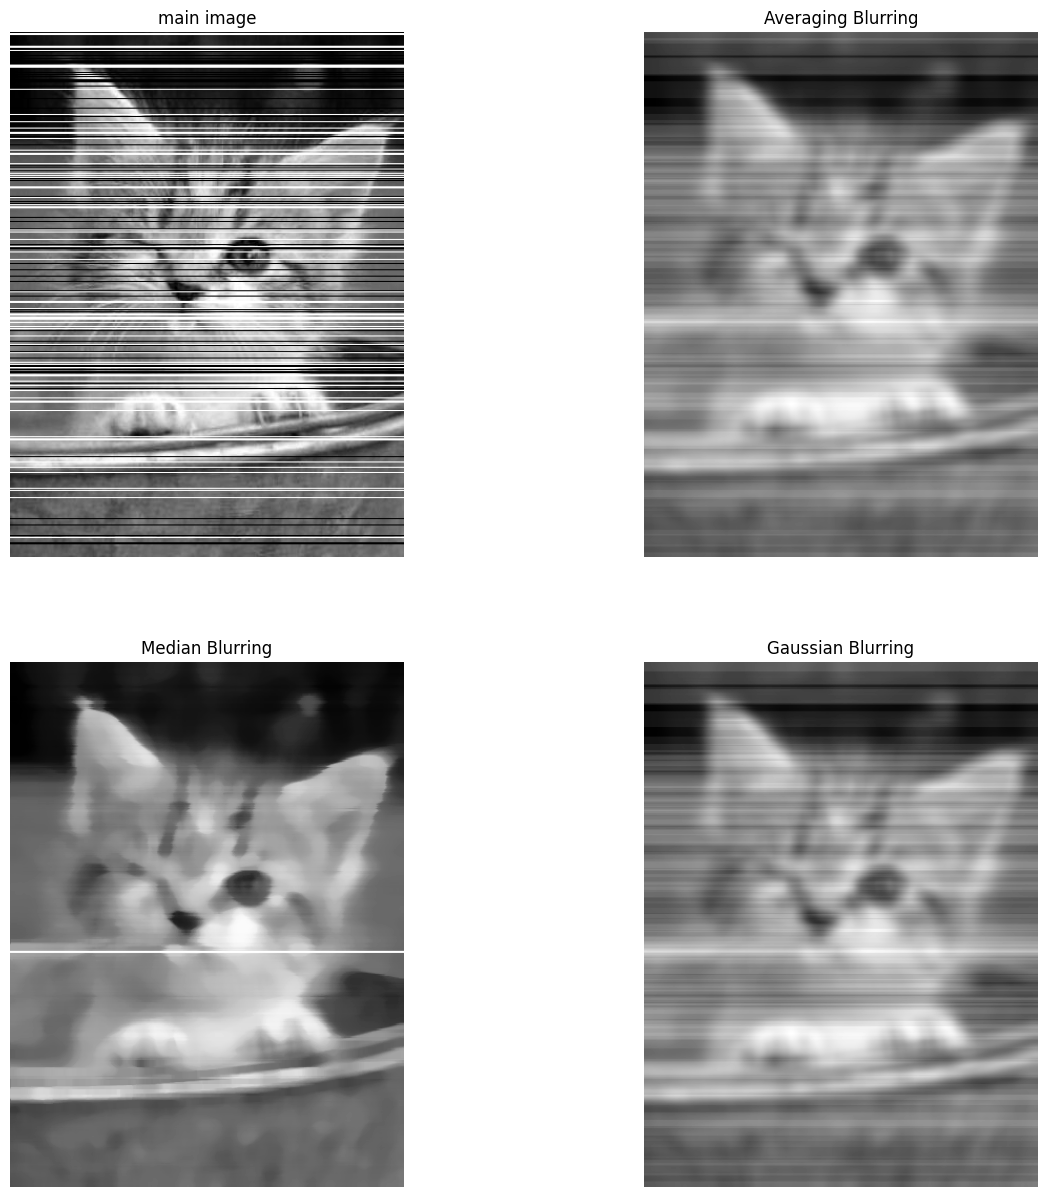

In [12]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [13]:
AveragingBlurring = cv2.blur(image,(15,15))
MedianBlurring = cv2.medianBlur(image,15)
GaussianBlurring = cv2.GaussianBlur(image,(15,15),40)

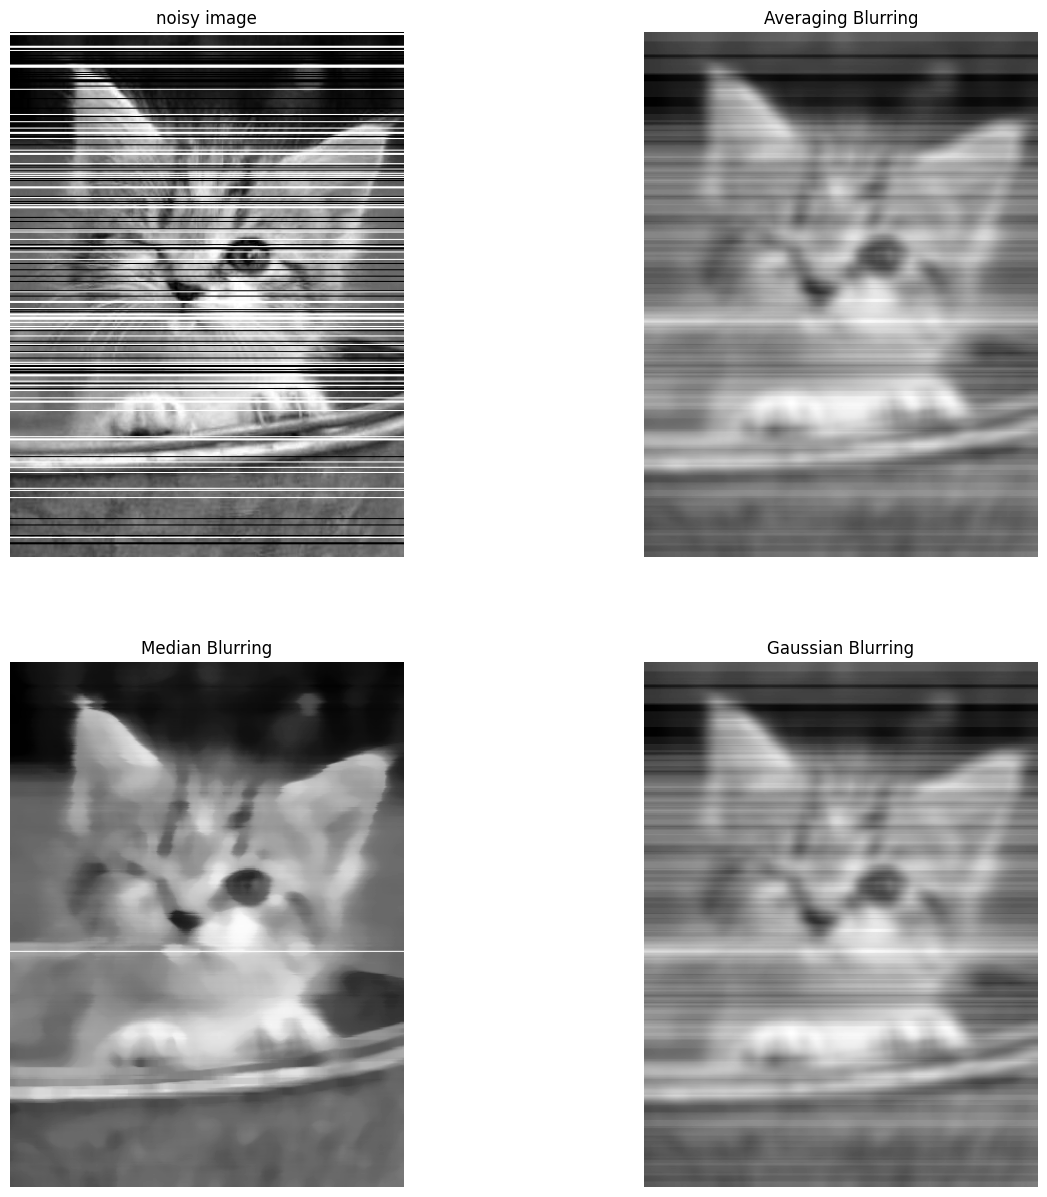

In [14]:
# Do not change this cell
Array = [image, AveragingBlurring, MedianBlurring, GaussianBlurring]
titles = ['noisy image', 'Averaging Blurring', 'Median Blurring', 'Gaussian Blurring']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")